<a href="https://colab.research.google.com/github/andregdmitri/Teste-de-hipotese-dos-50-bestsellers-da-amazon/blob/main/Multiv_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import f
import sympy as sym
from sympy import MatrixSymbol, Matrix, solve, linsolve, solveset, MatrixExpr
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd

# 2)

In [2]:
n = 42 
S = Matrix([[0.0144, 0.0117], [0.0117, 0.0146]])
x = Matrix([[0.564], [0.603]])
p = 2
alpha = 0.05

# 2) a) Estimador de Máxima Verossimilhança de $\mu$ e $\Sigma$
Resposta: Pelo resultado 4.11 de Jhonson e Wiechern, temos:

$\mu$ = $\bar x$  e $\Sigma = \frac{n-1}{n}S$

In [3]:
sigma = ((n-1)/n)*S
print("Sigma = \n" , sigma)

Sigma = 
 Matrix([[0.0140571428571429, 0.0114214285714286], [0.0114214285714286, 0.0142523809523810]])


$\mu$ = $\bar x$ = $\begin{bmatrix}
0.564\\
0,603
\end{bmatrix}$
\
\
$\Sigma = \frac{n-1}{n}S$ = $\begin{bmatrix}
 0.01405714 && 0.01142143 \\
 0.01142143 && 0.01425238
\end{bmatrix}$

# 2) b) Faça IC$_{0.95}(\mu)$, uma representação gráfica do elipsóide e $\mu_0$ = (0.6, 0.58) $\in$ IC?

Reposta:\
$IC_{0.95}(\mu) = n (\bar x - \mu)' S^{-1}(\bar x - \mu) \leq \frac{p(n-1)}{n-p}F_{p,n-p,0.05}$

Representando o lado esquerdo da equação

In [4]:
lado_direito = (((p*(n-1))/(n-p))*f.ppf(1-alpha, p, n-p))*sym.Identity(1)
A = (x - MatrixSymbol('mu', 2, 1))
lado_esquerdo = n*((A.T @ S.inv()) @ A)
lado_esquerdo

42*(Matrix([[0.564, 0.603]]) - mu.T)*Matrix([
[ 199.045671438309, -159.509202453988],
[-159.509202453988,  196.319018404908]])*(Matrix([
[0.564],
[0.603]]) - mu)

Valor numérico do lado esquerdo

In [5]:
lado_direito = (((p*(n-1))/(n-p))*f.ppf(1-alpha, p, n-p))*sym.Identity(1)
#A = (x - MatrixSymbol('mu', 2, 1))
A = (x - Matrix([[0.6], [0.58]]))
lado_esquerdo = n*((A.T @ S.inv()) @ A)
expr = lado_direito - lado_esquerdo

In [6]:
lado_esquerdo[0]

26.2904539877301

Valor numérico do lado direito

In [7]:
lado_direito[0][0]

6.62504033530323

Resolvendo a equação acima com $\mu_0' = [0.6, 0.58]$, obtemos que 26.2904 $\leq$ 6.6250 É FALSO, então esse valor de $\mu'$ não está na região de confiança.
O teste 
$H_0 : \mu_0' = \begin{bmatrix} 0.6, 0.58 \end{bmatrix}^T$ seria rejeitado, favorecendo $H_1: \mu \neq \begin{bmatrix} 0.6, 0.58 \end{bmatrix}^T$ para $\alpha = 0.05$


In [8]:
n = 42 
S = np.array([[0.0144, 0.0117], [0.0117, 0.0146]])
x = np.array([[0.564], [0.603]])
p = 2
alpha = 0.05

O elipsóide de confiança tem como centro $\bar x$, e o eixo maior e menor são dados por:\
$
\sqrt \lambda_1 \sqrt{\frac{p(n-1)}{n(n-p)} F_{p,n-p,0.05}}
$\
e\
$\
\sqrt \lambda_2 \sqrt{\frac{p(n-1)}{n(n-p)} F_{p,n-p,0.05}}
$

In [9]:
lambdas, autovetor = np.linalg.eig(S)
print(f"Autovalores, lambda1 = {lambdas[0]:.4f} e lambda2 = {lambdas[1]:.4f}")

Autovalores, lambda1 = 0.0028 e lambda2 = 0.0262


In [10]:
print(f"Autovetores, e1 = {autovetor[0]} e e2 = {autovetor[1]}")

Autovetores, e1 = [-0.71012207 -0.70407858] e e2 = [ 0.70407858 -0.71012207]


In [11]:
eixo_menor = np.sqrt(lambdas[0])*np.sqrt(((p*(n-1))/(n*(n-p)))*f.ppf(1-alpha, p, n-p))
print(f"Meio-comprimento do eixo MENOR é dado por {eixo_menor:.6f}")

Meio-comprimento do eixo MENOR é dado por 0.021014


In [12]:
eixo_maior = np.sqrt(lambdas[1])*np.sqrt(((p*(n-1))/(n*(n-p)))*f.ppf(1-alpha, p, n-p))
print(f"Meio-comprimento do eixo MAIOR é dado por {eixo_maior:.6f}")

Meio-comprimento do eixo MAIOR é dado por 0.064287


Elipse obtida:

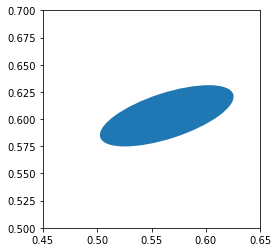

In [13]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ellipse = Ellipse(x, width= eixo_maior*2, height=eixo_menor*2, angle=0.05*360)
ax.add_artist(ellipse)

ax.set_xlim(0.45, 0.65)
ax.set_ylim(0.5, 0.7)

plt.show()

# 2) c) Intervalos de confiaça de 95% para $\mu_1$ e $\mu_2$
O intervalo de confiança simultanêo é dado por:\
$
\bar x_1 \pm \sqrt{\frac{p(n-1)}{n(n-p)} F_{p,n-p,0.05}} \sqrt{\frac{s_{11}}{n}}
$\
e\
$\
\bar x_2 \pm \sqrt{\frac{p(n-1)}{n(n-p)} F_{p,n-p,0.05}} \sqrt{\frac{s_{22}}{n}}
$

In [14]:
IC_x1 = [x[0] - (np.sqrt((p*(n-1)/(n*(n-p)))*f.ppf(1-alpha, p, n-p))*np.sqrt(S[0][0]/n)), x[0] + (np.sqrt((p*(n-1)/(n*(n-p)))*f.ppf(1-alpha, p, n-p))*np.sqrt(S[0][0]/n))]
IC_x2 = [x[1] - (np.sqrt((p*(n-1)/(n*(n-p)))*f.ppf(1-alpha, p, n-p))*np.sqrt(S[1][1]/n)), x[1] + (np.sqrt((p*(n-1)/(n*(n-p)))*f.ppf(1-alpha, p, n-p))*np.sqrt(S[1][1]/n))]

In [15]:
IC_x1 = np.array(IC_x1)
print(f"O intervalo de 95% confiança para mu1_barra está entre ({IC_x1[0][0]:.4f} , {IC_x1[1][0]:.4f})")

O intervalo de 95% confiança para mu1_barra está entre (0.5566 , 0.5714)


In [16]:
IC_x2 = np.array(IC_x2)
print(f"O intervalo de 95% confiança para mu2_barra está entre ({IC_x2[0][0]:.4f} , {IC_x2[1][0]:.4f})")

O intervalo de 95% confiança para mu2_barra está entre (0.5956 , 0.6104)


# 2) d) Teste de hipotesese para 
$
\begin{cases}
      H_0: \mu_0 = [0.60, 0.58]^T  \\
      H_1: \mu_0 \neq [0.60, 0.58]^T
\end{cases}
$


Resposta: Temos como estatística do teste,

$
T^2 = n (\bar \mu_0)' S^{-1}(\mu_0) \leq \frac{p(n-1)}{n-p} = c^2
$

In [17]:
n = 42 
S = Matrix([[0.0144, 0.0117], [0.0117, 0.0146]])
A = Matrix([[0.6], [0.58]])
p = 2
alpha = 0.05

In [18]:
lado_direito = (((p*(n-1))/(n-p))*f.ppf(1-alpha, p, n-p))*sym.Identity(1)
lado_esquerdo = n*((A.T @ S.inv()) @ A)
expr = lado_direito - lado_esquerdo

In [19]:
lado_esquerdo[0]

1120.54969325153

In [20]:
lado_direito[0][0]

6.62504033530323

Como $T^2 = 1120.5496 \geq 6.6250 = c^2$, o teste falha, logo, rejeitamos $H_0$ ao nível de signficância de 5%.

# 4) DataFrame Iris

In [21]:
!pip install statsmodels --quiet

In [22]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns

In [23]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'
df = pd.read_csv(url, index_col=0)
df.columns = df.columns.str.replace(".", "_")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## 4) a)

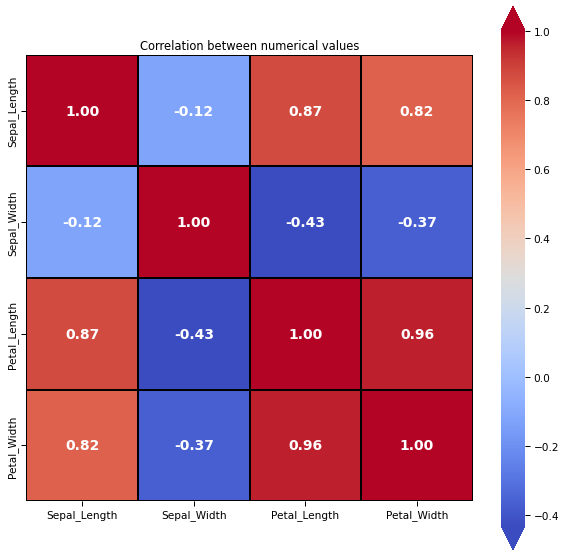

In [24]:
numerical_values = df.select_dtypes(exclude=object) #Valores Numericos

plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.2)
corr = numerical_values.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1,linecolor='black', fmt='.2f',
            annot_kws={'fontsize':'large', 'fontweight':'semibold'},
            cbar_kws={'extend':'both'}, square=True)
plt.title('Correlation between numerical values');


Podemos observar que Sepal_lenght com Petal_width, Sepal_lenght com Petal_lenght, e Petal_lenght com petal_width apresentam grande correlação.

In [25]:
import plotly.express as px

In [26]:
fig = px.box(df, color="Species")
fig.show()

In [27]:
maov = MANOVA.from_formula('Sepal_Length + Sepal_Width + \
                            Petal_Length + Petal_Width  ~ Species', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

Acima podemos observar que nosso valor F é bem alto, indicando que a variancia entre os grupos é maior que a variância dentro dos grupos.

# 4)b)

In [33]:
p = 4
n = 150
x_barra = numerical_values.mean().values
x_barra = np.array([x_barra]).T
x_barra

array([[5.84333333],
       [3.05733333],
       [3.758     ],
       [1.19933333]])

In [34]:
S = np.cov(numerical_values)

In [35]:
for i in range(x_barra.size):
  IC_x = [x_barra[i] - (np.sqrt((p*(n-1)/(n*(n-p)))*f.ppf(1-alpha, p, n-p))*np.sqrt(S[i][i]/n)), x_barra[i] + (np.sqrt((p*(n-1)/(n*(n-p)))*f.ppf(1-alpha, p, n-p))*np.sqrt(S[i][i]/n))]
  print(f"O intervalo de 95% confiança para mu{i}_barra  ({df.columns[i]}) está entre ({IC_x[0][0]:.4f} , {IC_x[1][0]:.4f})")

O intervalo de 95% confiança para mu0_barra  (Sepal_Length) está entre (5.7975 , 5.8891)
O intervalo de 95% confiança para mu1_barra  (Sepal_Width) está entre (3.0145 , 3.1001)
O intervalo de 95% confiança para mu2_barra  (Petal_Length) está entre (3.7160 , 3.8000)
O intervalo de 95% confiança para mu3_barra  (Petal_Width) está entre (1.1592 , 1.2395)
